In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Introduction to Neural Networks with Python - Part 1

### What is an Artificial Neural Network?

> Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.
 -- [deeplearning4j](https://deeplearning4j.org/neuralnet-overview)

![Artificial Neural Network](figs/ann.png)

An artificial neural network, or ANN, is __composed of a set of neurons, or perceptrons__, that are connected in a __hierarchical order__. In the context of __supervised learning__, where the objective is to __approximate a function given some data__, neural networks are theoretically able to approximate any function. Thus, neural networks are also referred to as __universal function approximators__. 

### Perceptrons

Let's start with a single neuron first, also called the Perceptron.


![Perceptron](figs/perceptron.png)

A perceptron is a node that accepts a __fixed arbitrary number of inputs__, and gives a __single output__.


The __importance of the inputs__ of a perceptron is represented by the __weights__ or visually, the strength of the edges from the inputs to the neurons.

As the perceptron is biologically-inspired from how actual neurons work, if the values of the inputs satisfy a certain threshold then the perceptron gets turned on or "activated". This threshold value is commonly referred to as the __bias__.

For now, let's just assume that the activation output of the perceptron is binary, meaning that its outputs are just 0 or 1.

Mathematically, it's expressed as:

![Perceptron Equation](figs/perceptron_eq.png)

where $\cdot$ is the dot product of the inputs and the weights.

Generalizing the equation for the perceptron, 

$ output = \alpha(w \cdot x + b) $

where $ \alpha $ = 1 if greater than 0, else 0.

$ \alpha $ refers to the __activation__ function.

In [2]:
# Code implementation of a simple perceptron

w = [0.1, 0.2, 0.7]
x = [1, 1, 0]
b = -0.4

def activation(val):
    if val <= 0:
        return 0
    else:
        return 1

output = activation(np.dot(w, x) + b)
print("Ther perceptron output is %d" % output)

# Exercise:
# Can you create an activation function that results to a perceptron acting as a linear regression?

Ther perceptron output is 0


The binary activation function of the perceptron is a bit limiting. What if we wanted outputs that are not just 0s or 1s? 

One available activation function that we can use is the sigmoid $\sigma$ or logistic function.

![Sigmoid function](figs/sigmoid_eq.png)

It's good to note that there are a lot of activation functions that are being used in neural networks. ReLu, ELU, SeLU, and a whole lot of these functions greatly determine the performance of neural networks. Finding good activation functions are still an active area of research in this field.

In fact, the sigmoid or logistic function isn't used that often as it encounters the __vanishing gradient problem__, which will be discussed later on. 

But for now, it's a great starting point for learning.


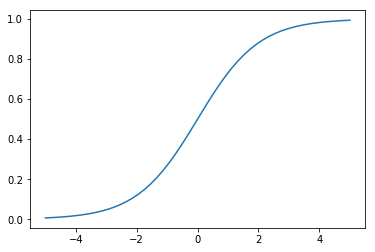

In [3]:
def sigmoid(val):
    return 1 / (1 + np.exp(-val))

w = [1]
xs = np.linspace(-5, 5)
b = 0
outputs = []
for x in xs:
    outputs.append(sigmoid(np.dot(w, x) + b))

plot(xs, outputs)

__Now what? How does a perceptron or neural networks even _learn_?__

You might have noticed that the __weights and the biases__ of a perceptron heavily __influences its output__, and you're right! 

Recall that the objective is to __approximate a function given some data__. 

Thus, if we give __a set of inputs and outputs__ for our perceptron, it should be able to __adjust its weights and bias accordingly__. 

How then, can the perceptron know that it needs to improve and change its weights and biases? 

### The Cost function
Also referred to as the objective function or the loss function.

The mission of the cost function is __to quantify__ and tell the perceptron on how __good or accurate__ it is when given some inputs and target outputs.

Like the activation function, there are a variety of cost functions that we can use. For now, let's stick with the __Mean Squared Error__ or __MSE__.

Mathematically, it's defined as:

$ C(w, b) = \frac{1}{n} \sum_x (y_p(x) - y_t)^2 $

Where: 

__w__ is the weights

__b__ is the bias

__n__ is the number of data points

__$y_p$__ is the predicted output of the perceptron

__x__ input data

__$y_t$__ is the real output

The properties of the MSE function is as follows:

1. It is always positive, because of the squaring of the differences between the predicted and target outputs.
2. When the difference between the predicted and target outputs are high, then the value of the cost function is also high.
3. If the predicted and target outputs are the same, then the cost function will be 0.

In [4]:
# Implementation of the Mean Squared Error

def sigmoid(val):
    return 1 / (1 + np.exp(-val))

def perceptron(w, b, x):
    return sigmoid(np.dot(w, x) + b)

def cost_function(w, b, xs, yts):
    n = len(xs)
    squared_err = np.array([])
    for x, yt in zip(xs, yts):
        squared_err = np.append(squared_err, np.square(perceptron(w, b, x) - yt))
    return squared_err.sum() / n

In [5]:
# Example calculation of cost function

w = [0.5, 0.3, 0.8]
b = -0.4
xs = [[1, 0, 1], 
      [1, 1, 1],
      [0, 1, 0], 
      [0, 1, 1], 
      [1, 0, 0]]
yts = [0.5, 0.2, 0.8, 0.8, 0.1]

print("Calculated cost is ", cost_function(w, b, xs, yts)) 

Calculated cost is  0.13426267352


__Now that the perceptron "knows" how good its weights and bias are, how can it adapt and attempt reduce the cost function to zero?__

### Optimization Algorithms
The goal of optimization algorithms is __to reduce the cost function__ to its minimum value. 

Like activation and cost functions, there are also a variety of different optimization algorithms. For neural networks, the popular and mostly successful one is a family of algorithms called __Gradient Descent__.

An ELI5 or Explain like I'm 5 for gradient descent is:

> Imagine you're standing somewhere on a mountain. You want to get as low as possible as fast as possible, so you decide to follow these steps:
You check your current altitude, your altitude a step north, a step south, a step east, and a step west. Using this, you figure out which direction you should step to reduce your altitude as much as possible in this step.
Repeat until stepping in any direction will cause you to go up again.
Now, this is a wonderfully simple algorithm. You just have to figure out which direction the mountain is sloping where you are (this is the gradient) and take a step (this is your descent). -- [koooooj](https://www.reddit.com/r/explainlikeimfive/comments/2akok1/eli5_what_is_gradient_descent/ciw488c/) 

Given the possible outputs of a cost function of a 2-input perceptron is the graph below.

![Cost graph](figs/cost_graph.png)

Mathematically, in the context of our perceptron:

![Gradient Descent](figs/grad_descent_eq.png)

Where:

$ \eta $ is the learning rate or how large the step of the gradient descent will be.

In [6]:
def GD_training():
    w = np.array([0.5, 0.3, 0.8])
    b = -0.4
    xs = np.array([[1, 0, 1], 
          [1, 1, 1],
          [0, 1, 0], 
          [0, 1, 1], 
          [1, 0, 0]])
    yts = [0.5, 0.2, 0.8, 0.8, 0.1]
    eta = 0.01
    for i in range(200):
        cost = cost_function(w, b, xs, yts)
        w -= eta * cost
        b -= eta * cost
        if i % 10 == 0:
            print("Step ", i, ": ", cost)
    print("Calculated weights: ", w)
    print("Calculated bias: ", b)

In [7]:
GD_training()

Step  0 :  0.13426267352
Step  10 :  0.131649082408
Step  20 :  0.129149946578
Step  30 :  0.126765301758
Step  40 :  0.124494919158
Step  50 :  0.122338339541
Step  60 :  0.12029490698
Step  70 :  0.11836380186
Step  80 :  0.116544072756
Step  90 :  0.114834666907
Step  100 :  0.113234459065
Step  110 :  0.111742278571
Step  120 :  0.110356934567
Step  130 :  0.109077239293
Step  140 :  0.107902029477
Step  150 :  0.106830185839
Step  160 :  0.105860650771
Step  170 :  0.104992444258
Step  180 :  0.104224678142
Step  190 :  0.103556568801
Calculated weights:  [ 0.26977761  0.06977761  0.56977761]
Calculated bias:  -0.630222387699


### Exercises
1. Try to use other cost functions, such as RMSE or MAE. How does it affect the gradient descent process?
2. What about activation functions? Does the sigmoid function help or not? 

## Next Week

1st Day:
1. We'll be creating our own multilayer perceptrons (MLPs)
2. We'll be discussing about how backpropagation works

2nd Day:
1. We'll fast track to using Tensorflow and its various APIs.
2. We'll be discussing about Convolutional Neural Networks.

### Credits to
[Michael Nielsen: Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)
for the Concepts, figures, and graphs